# Data description :

# 1 - Introduction:

The primary cause of death in the world is heart failure disease¹.In 2019, 32 percent of all deaths worldwide were attributed to CVDs, killing an estimated 17.9 million people. Heart attacks and strokes were to blame for 85% of these deaths[2].
our data set is generated to model a Heart Failure Prediction result. we aim to study data that will then help us solving a problem that early diagnosis of coronary heart disease that is important to enable counseling and medication management.This is by having factors that increase the risk of heart disease.


¹Heart failure is a lifelong condition in which the heart muscle can't pump enough blood to meet the body's needs for blood and oxygen.

# 2- Machine learning tasks:
Our problem will be classification, Classification is a supervised machine learning method where the model tries to predict the correct label of a given input data so in our case,  HeartDisease as {0,1}, indicating weather a patient had a Heart Disease or not. 
As a result, the data will be divided into two groups: [1: Having heart disease, 0: Normal].


# 3- Data: 
The dataset is called "Heart Failure Prediction Dataset" which we got from Koggle.com. it is data for classifing patients based on weather a patient had a Heart Disease or not,our dataset is the largest heart disease dataset currently available for research purposes, this dataset combines 5 heart datasets using 11 features in common.

URL : https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

The data set contains 918 observations with 12 attributes.
# Attribute Information
| Variable | Type | Definition | Guide |
| --- | --- | --- | --- |
| Age | Integer | age of the patient | years |
| Sex | String | sex of the patient | M: Male, F: Female |
| ChestPainType |String | chest pain type | <br>TA: Typical Angina<br><br>ATA: Atypical Angina<br><br>NAP: Non-Anginal Pain<br><br>ASY: Asymptomatic<br> |
| RestingBP | Integer |resting blood pressure | mm Hg |
| Cholesterol | Integer | serum cholesterol | mm/dl |
| FastingBS | Integer | fasting blood sugar | 1: if FastingBS > 120 mg/dl<br><br>0: otherwise |
| RestingECG |String | resting electrocardiogram results | Normal: Normal<br><br>ST: having ST-T wave abnormality<br><br>LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria |
| MaxHR |Float | maximum heart rate achieved | Numeric value between 60 and 202 |
| ExerciseAngina |String | exercise-induced angina | Y: Yes, N: No |
| Oldpeak | Float |oldpeak = ST | Numeric value measured in depression |
| ST_Slope |String | the slope of the peak exercise ST segment | Up: upsloping, Flat: flat, Down: downsloping |
| HeartDisease |  Integer |output class | 1: heart disease, 0: Normal |

# Importing libraries :

In [163]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [164]:
#df=pd.read_csv("../input/heart-failure-prediction/heart.csv")
df=pd.read_csv("heart.csv")

  Sample of 5 observations from the dataset 'Heart Failure Prediction' with all attributes using head() method that shows the first 5 rows in the dataset


In [165]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Our dataset shape indicating (number of observations , number of variables) as the result there are 918 observations and 12 variables

In [166]:
df.shape

(918, 12)

Use the info() function to summarize the data we have, the attributes and their type, and if there is any null value in any row, memory usage. Our dataset does not contain any null value, therefore no missing data.

In [167]:
df.info()
#we have three types in this data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Use .describe() and .var() function for statistical summaries to show the count ,mean ,max and variance for each numerical attributes

In [168]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [169]:
df.var()

/var/folders/b3/40fzxp_n56bdsb043f5jvzn80000gn/T/ipykernel_52833/1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Age                88.974254
RestingBP         342.773903
Cholesterol     11964.891079
FastingBS           0.178968
MaxHR             648.228614
Oldpeak             1.137572
HeartDisease        0.247420
dtype: float64

Understanding the data,  Figure 1 shows indicates that patients who have heart disease (yes = 502) and patients who did not have heart disease (no = 405), which means most patients are likely to have heart disease, especially with males Figure 2 .

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

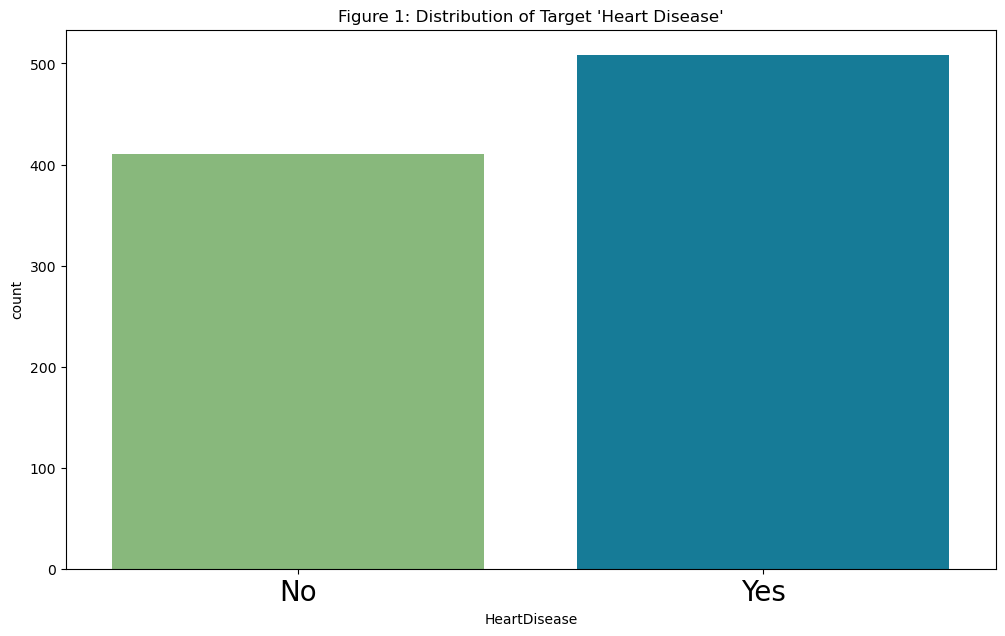

In [170]:
plt.figure(figsize=(12, 7))
heartDisease_countplot = sns.countplot(x=df.HeartDisease,palette=["#82C272", "#0087AC"])
heartDisease_countplot.set_title("Figure 1: Distribution of Target 'Heart Disease'")
heartDisease_countplot.set_xticklabels(['No', 'Yes'], fontsize=20)
#OUR TARGET IS Heart Disease :

<Figure size 1200x700 with 0 Axes>

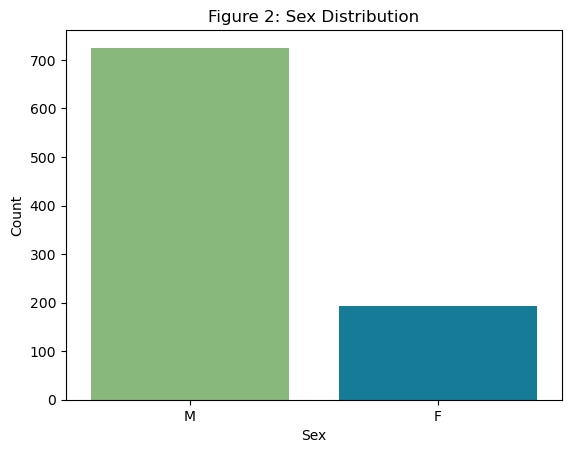

<Figure size 1200x700 with 0 Axes>

In [171]:
sns.countplot(data=df,x='Sex' , palette=["#82C272", "#0087AC"]);
plt.title('Figure 2: Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.figure(figsize=(12, 7))

in Figure 2,  we notice the who have more heart disease is the males 

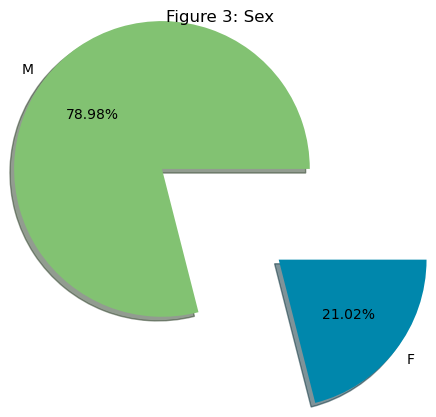

In [172]:
plt.rcParams.update({'font.size': 10})
ax=df['Sex'].value_counts().plot.pie(explode=[0.5,0.5],autopct='%1.2f%%',shadow=True , colors=["#82C272", "#0087AC"]);
ax.set_title(label = "Figure 3: Sex");
plt.axis('off');


in Figure 3,  we find 78.98% of makes have heart disease and 21.02% of females have heart disease and 
males are approximately 3 times more likely to have heart disease than females.

In [173]:
df.ChestPainType.unique() 

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

Here we check the types of chestpain :we have four types of chest pain 
    ATA,NAP,ASY,TA
   

In [174]:
ChestPainType_label = ['ATA', 'NAP', 'ASY', 'TA']
ChestPainType_size = [173, 203, 496, 46]
ChestPainType_explode = (0, 0, 0, 0)

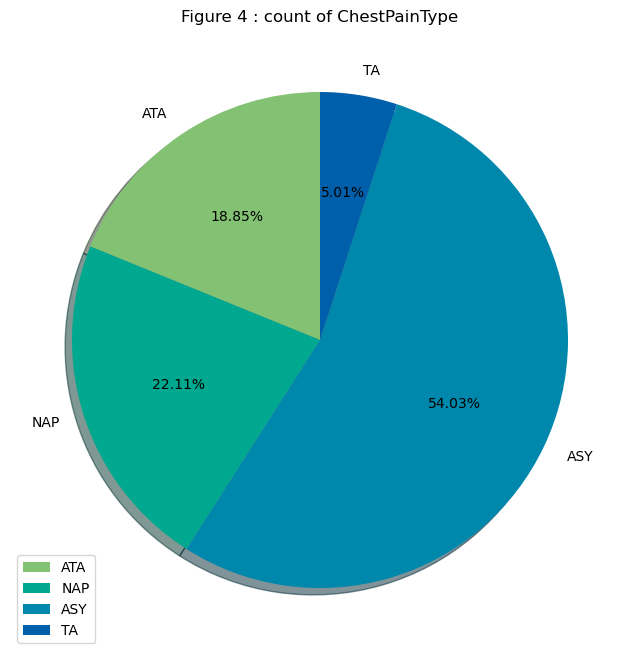

In [175]:
plt.figure(figsize=(8,9))
plt.pie( ChestPainType_size , explode=ChestPainType_explode , labels=ChestPainType_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors= ["#82C272", "#00A88F", "#0087AC", "#005FAA", "#323B81"])
plt.title("Figure 4 : count of ChestPainType")
plt.legend()

Figure 4 shows that Asymptomatic(ASY) is the type who has the highest pre for the pain chest .

Here first we have to know that  RestingECG is :a non-invasive test that can detect abnormalities including arrhythmias,evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks. 

In [176]:
RestingECG_label = ['Normal', 'ST', 'LVH']
RestingECG_size = [552, 178, 188]
RestingECG_explode = (0, 0, 0)

Figure 5 shows three levels of restingEGG':'Normal', 'ST', 'LVH'

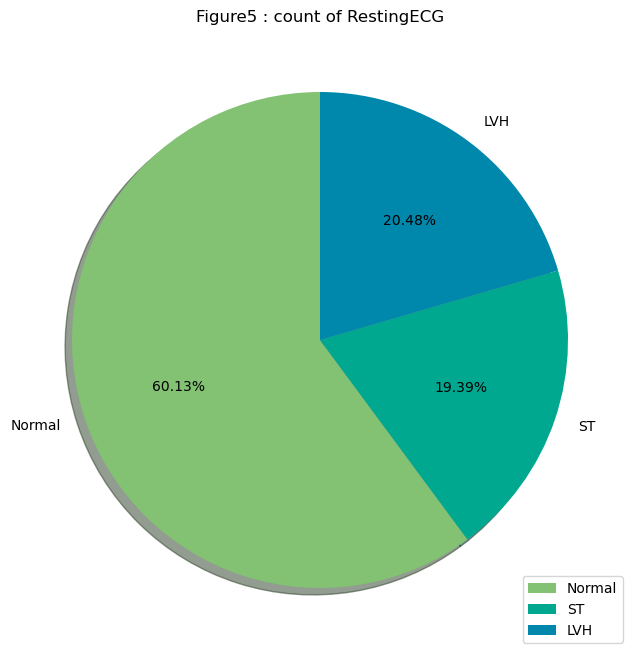

In [177]:
plt.figure(figsize=(8,9))
plt.pie( RestingECG_size , explode=RestingECG_explode , labels=RestingECG_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=["#82C272", "#00A88F", "#0087AC", "#005FAA", "#323B81"])
plt.title("Figure5 : count of RestingECG")
plt.legend()

in Figure 5 , we find that the normal have the highest percentage. 

In [178]:
ExerciseAngina_label = ['yes', 'no']
ExerciseAngina_size = [552, 178]
ExerciseAngina_explode = (0, 0)

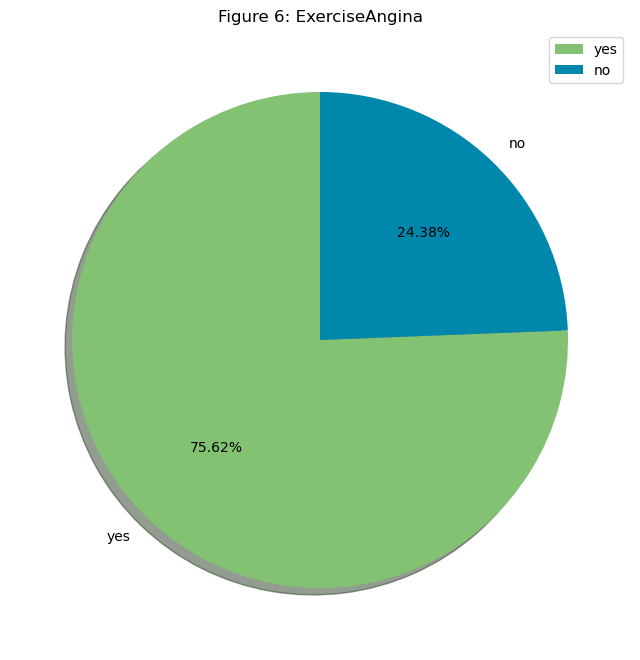

In [179]:
plt.figure(figsize=(8,9))
plt.pie( ExerciseAngina_size , explode=ExerciseAngina_explode , labels=ExerciseAngina_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=["#82C272", "#0087AC"])
plt.title("Figure 6: ExerciseAngina")
plt.legend()

in figure 6, shows who had ExerciseAngina(Yes) is more than who did not(No) and by persentage is 75.62%

In [180]:
ST_Slope_label = ['Flat','Up','Down']
ST_Slope_size = [552, 178, 188]
ST_Slope_explode = (0, 0, 0)

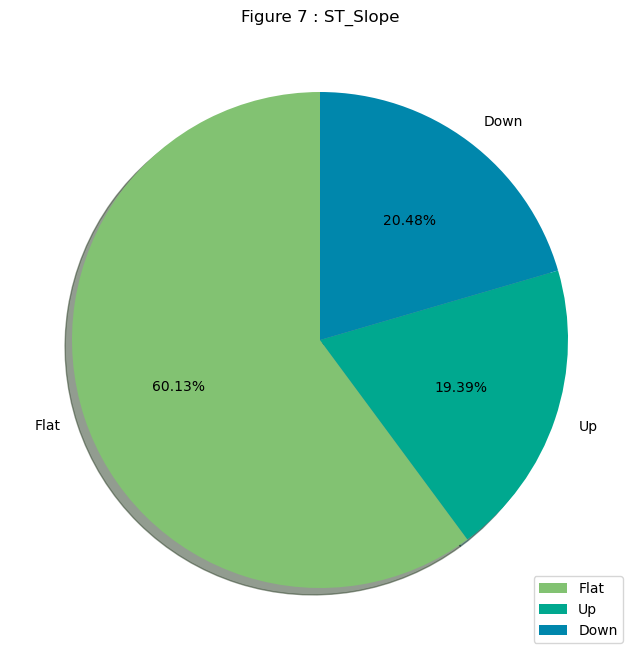

In [181]:
plt.figure(figsize=(8,9))
plt.pie( ST_Slope_size , explode=ST_Slope_explode , labels=ST_Slope_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=["#82C272", "#00A88F", "#0087AC", "#005FAA", "#323B81"])
plt.title("Figure 7 : ST_Slope")
plt.legend()

Figure 7 shows ST_Slope, which is the peak exercise ST segment, and the graph shows that the majority was flat.

In [182]:
Categorical = df.select_dtypes(include=['object'])
Numerical = df.select_dtypes(include=['int64', 'float64'])


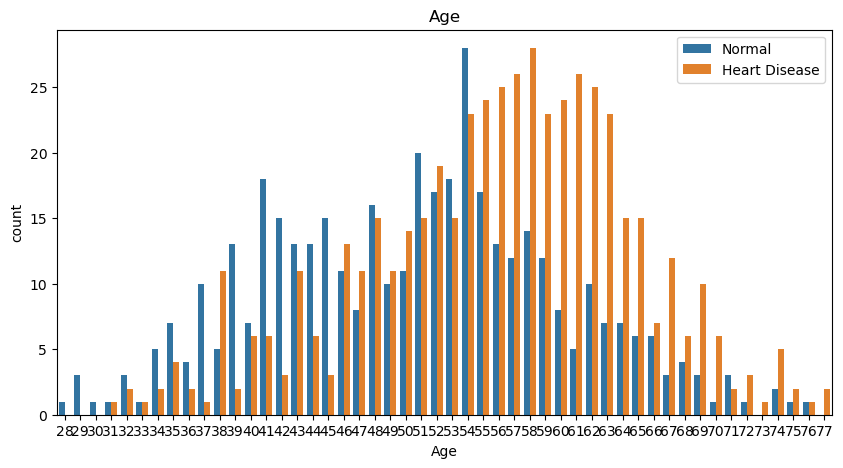

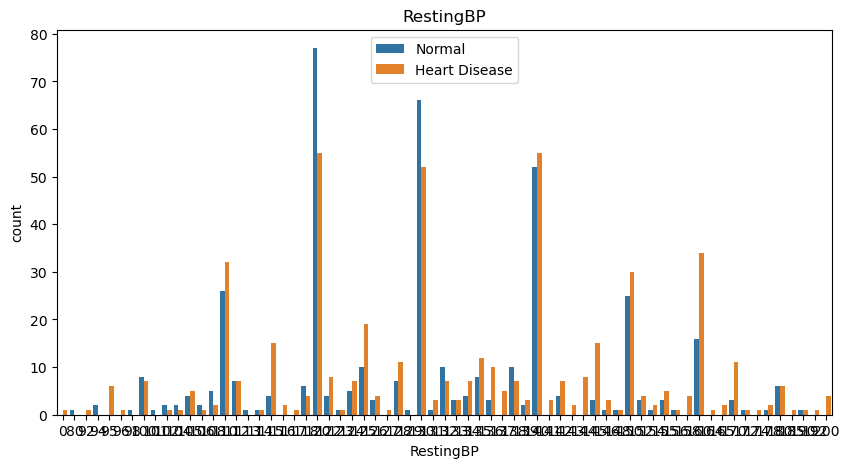

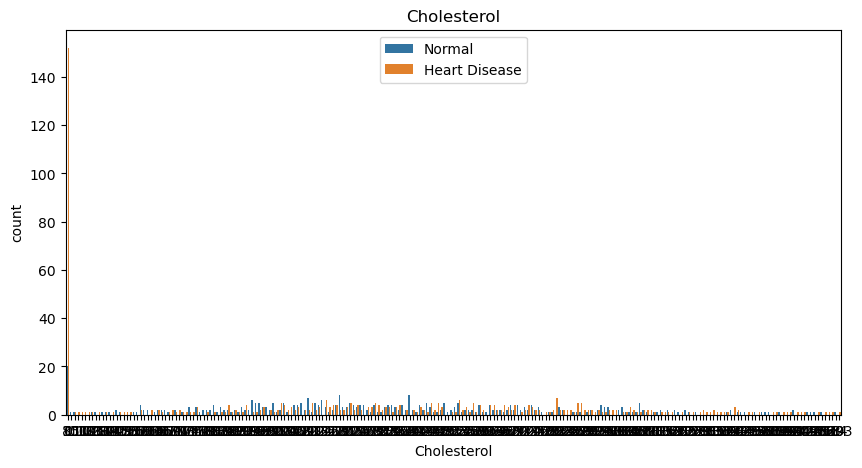

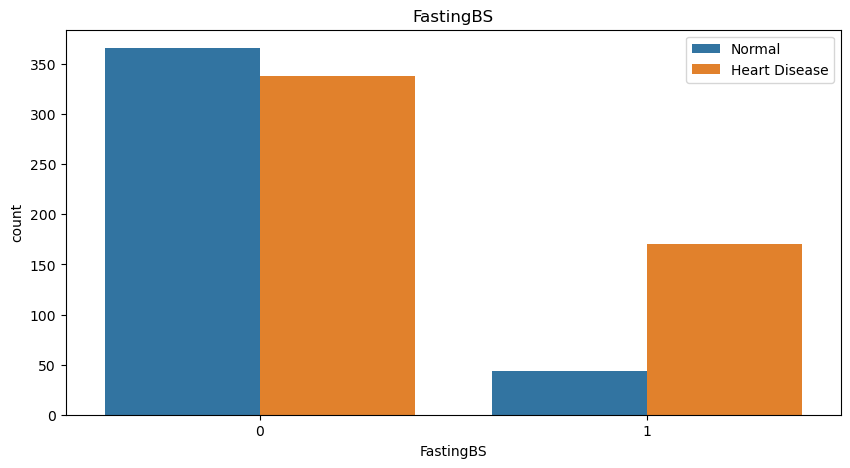

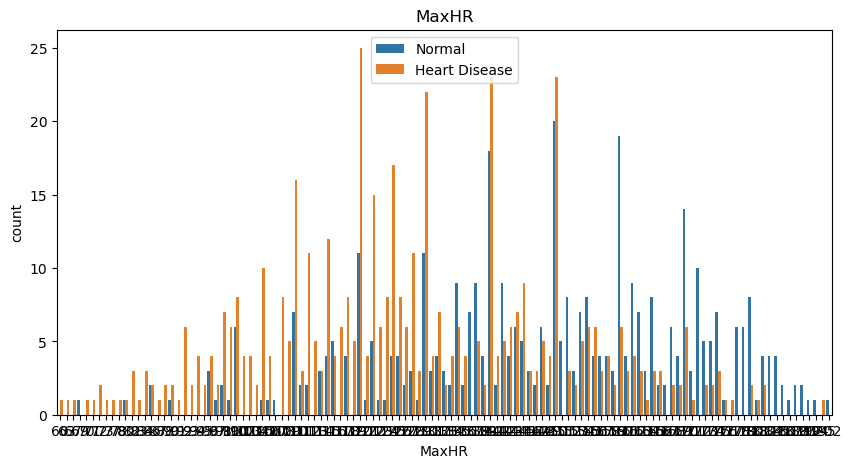

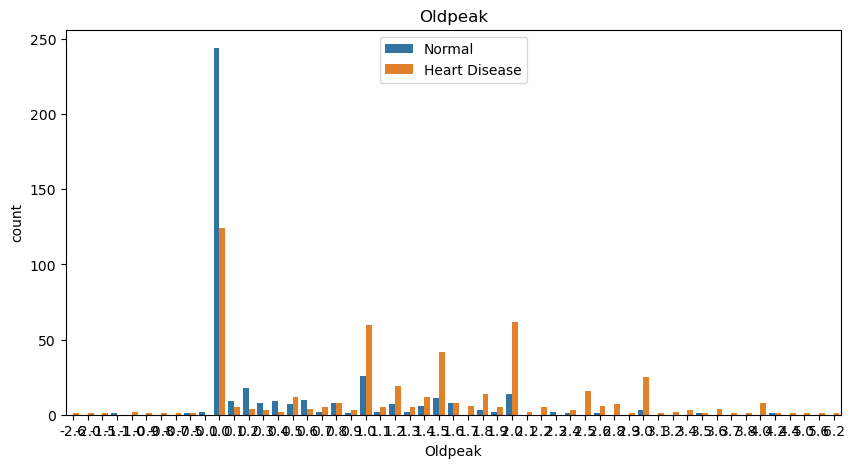

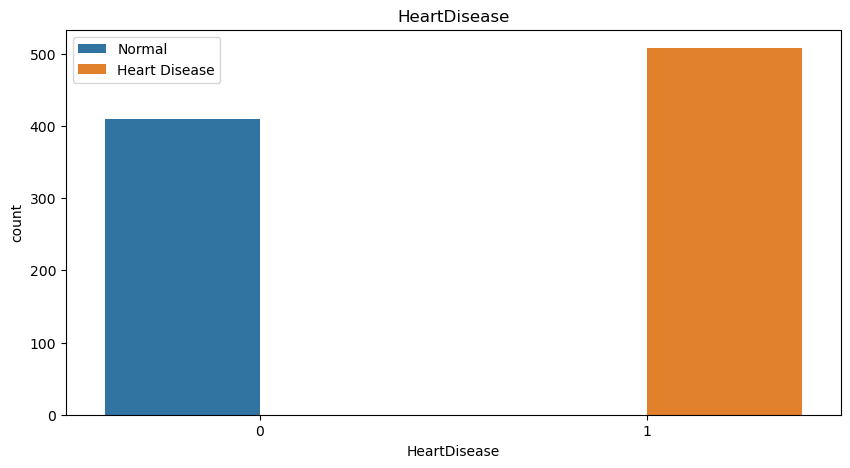

In [183]:
# ploting numerical features with target
#here we compare betwwen our target and our numerical features 
for i in Numerical:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i, data=df, hue='HeartDisease')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

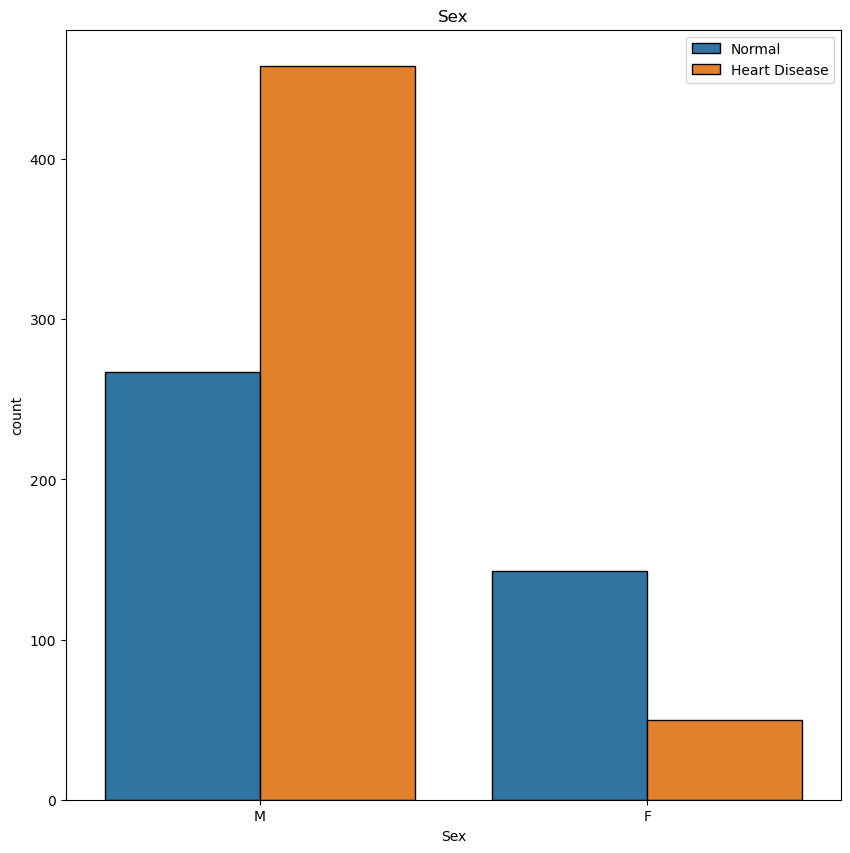

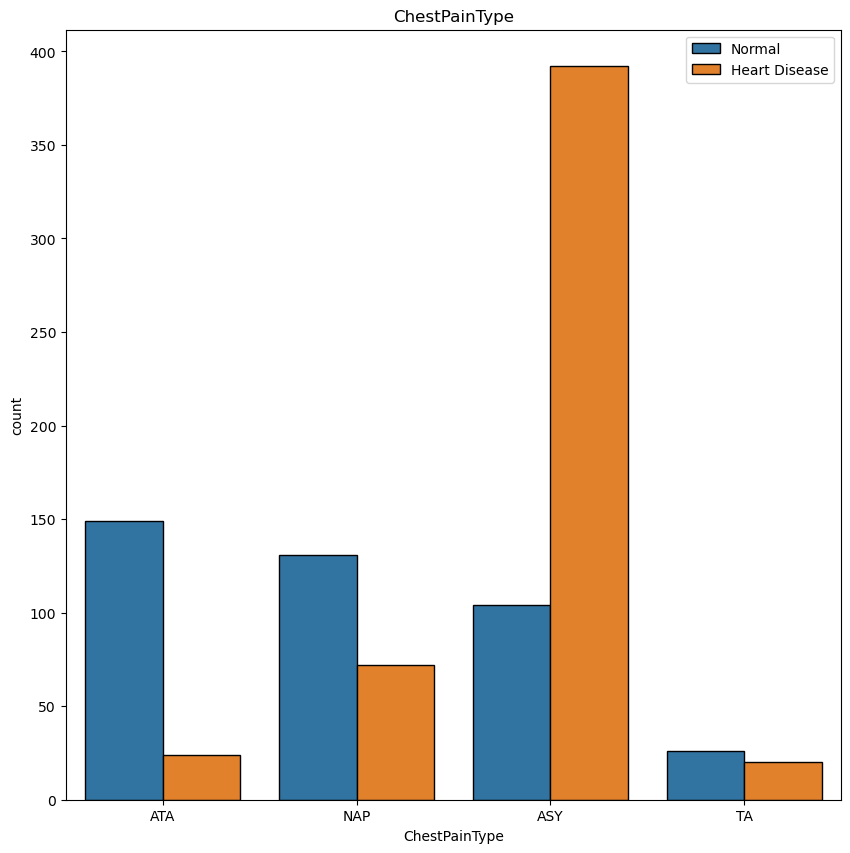

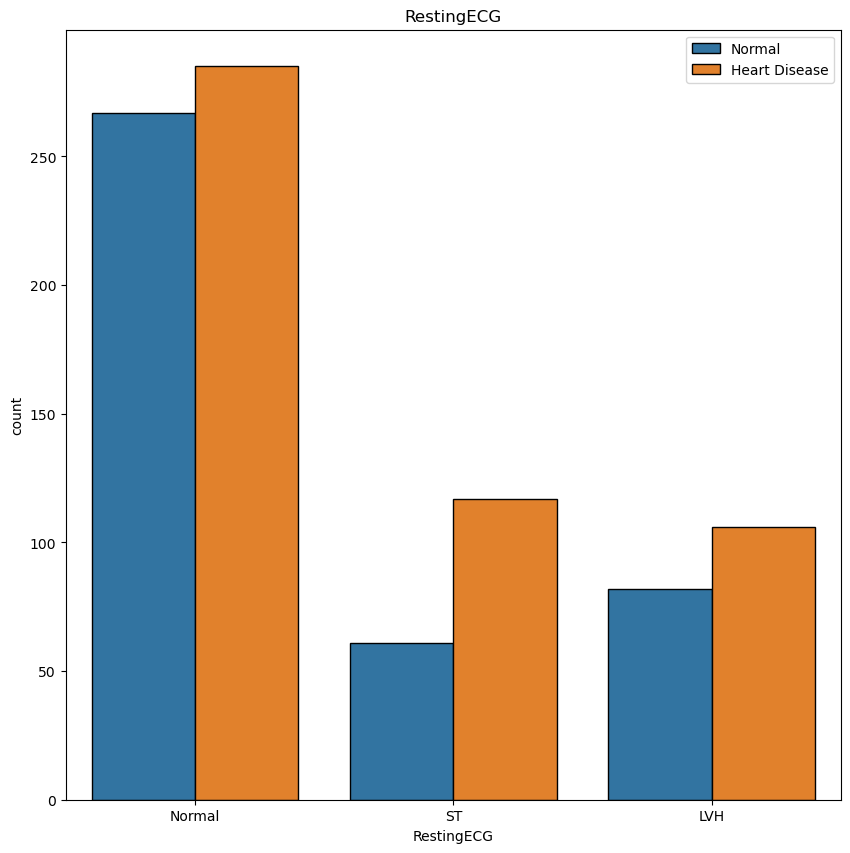

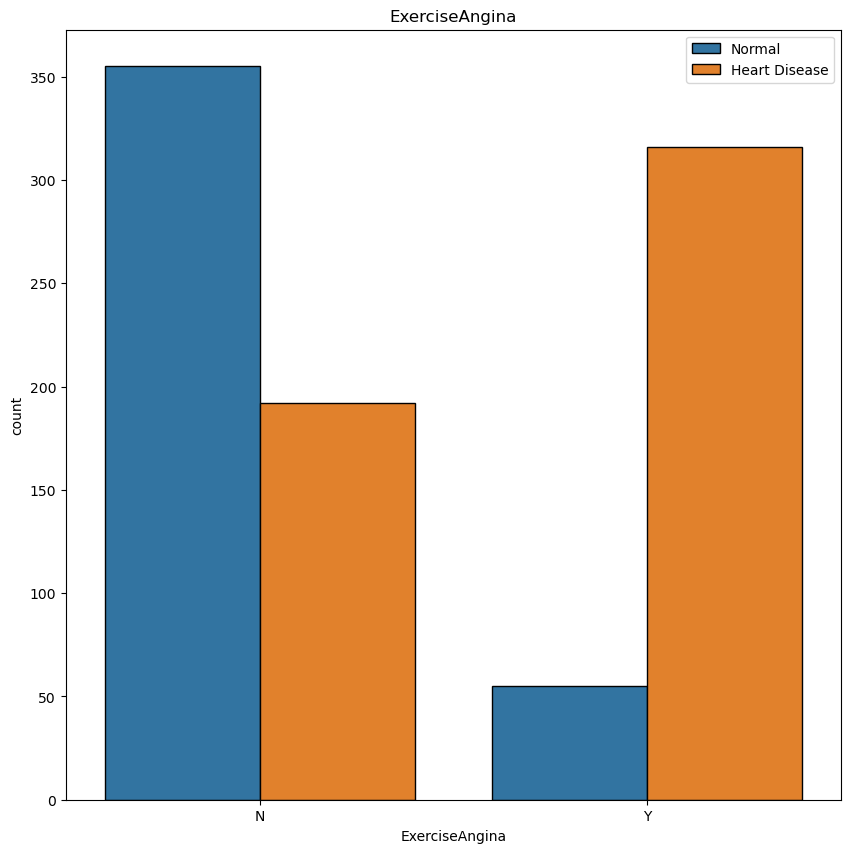

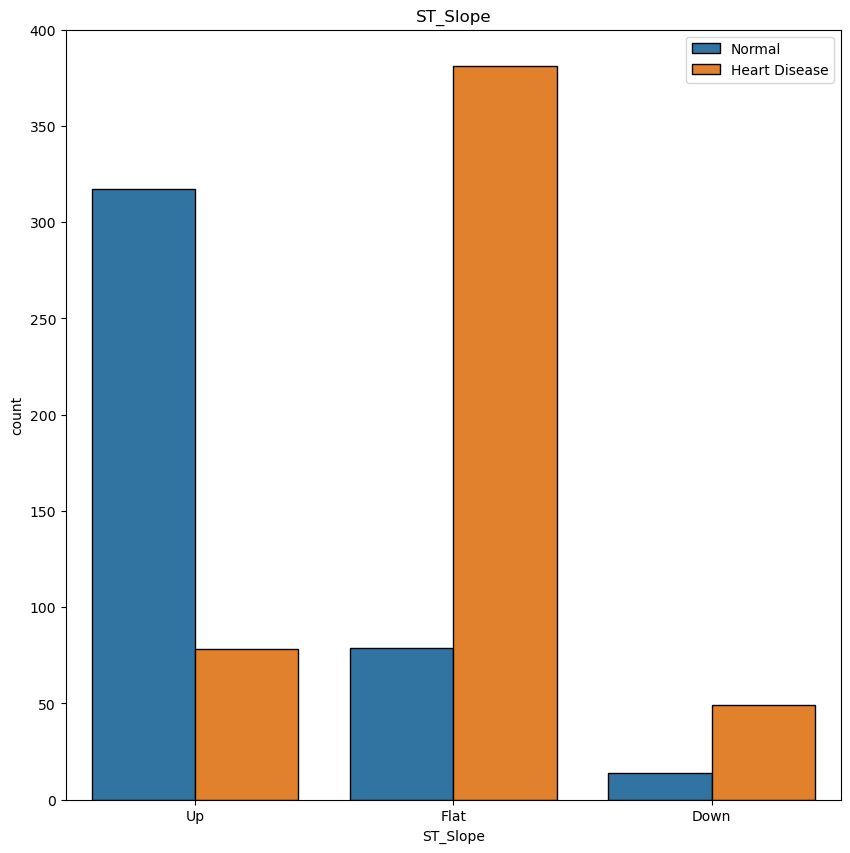

In [184]:
#here we compare betwwen our target and our Categorical features 
for i in Categorical:
    plt.figure(figsize=(10,10))
    sns.countplot(x=i, data=df, hue='HeartDisease', edgecolor='black')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

##### observations after EDA:
1-Males are consistently more likely to have heart disease.

2-Inidividuals with ASY chest pain are consistently more likely to have heart disease.ATA and NAP are consistently less liekly to have heart disease.
The trend is inconsistent for individuals with TA.

3-Flat and down ST_Slope have higher HeartDisease rate while Up ST_Slope has lower HeartDisease rate.

4-People with higher oldpeak tend to have exercise engima. There is no obvious trend with other categorical variables

5-Cholesterol seem to be higher in females and people with low fasting blood sugar, though the difference looks small.

6-Most of heart disease Patients have age between 55 and 65

7- Most patients with 0 oldpeak, don't have Heart disease

8- Most tested Patients have RestingBP between 120 and 150


# 4-Data Preprocessing

Filling in missing values, removing noise in the data, resolving discrepancies, and removing outliers are all parts of data cleaning during data preprocessing.

### 1- Missing values:

We checked for missing data after importing the libraries and reading the dataset's csv file and discovered that there are none.

In [185]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

no missing data

### 2- Duplicated data:

We checked if there is duplicate data and we found that there is no duplicate data.

In [186]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

### 3- Noisy data (Outliers):

We used a boxplot to show the data, and we discovered that the outliers in (Age - RestingBP - Cholesterol - MaxHR - Oldpeak)

<AxesSubplot:>

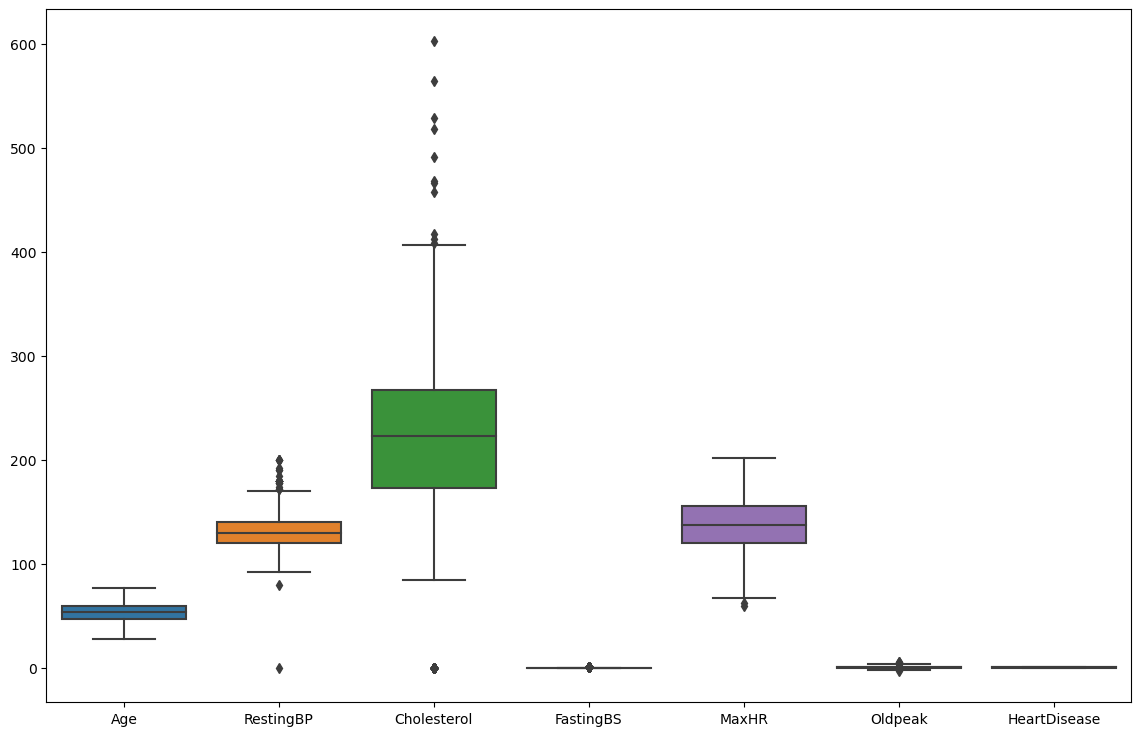

In [187]:
plt.figure(figsize=(14,9))
sns.boxplot(data=df)

The codes below shows the maximum and minimum outliers as well as the outliers for each attribute. Our data set is used to forecast heart disease, and this forecast depends on changes in MaxHR and Oldpeak. Thus, we are unable to remove these rows. We must transform these values because Cholesterol and RestingBP cannot both be 0, even in the case of a dead person who still has hydrostatic blood pressure. 

after the boxplot we find that the outliers here in (age - restingBP-cholesterol-MaxHR-oldpeak)

so that i decided to make alist of them 

In [188]:
df_num_name = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


also in cholesterol histogram we can see there are some zero values that we want to deal with them.

In [189]:
#here we are detecting outliers :

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [190]:
#here we are trying to find the numbers of outliers and max and min of them to can detect them clearly:
outliers = find_outliers_IQR(df['RestingBP'])
print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

number of outliers: 28
max outlier value: 200
min outlier value: 0


we find that there are 27 outliers and max ouliers id 200 and the min is 80 

In [191]:
for char in df_num_name :
    outliers = find_outliers_IQR(df[str(char)])
    
    print(f"-Check {char} outliers ")

    print('number of outliers: '+ str(len(outliers)))

    print('max outlier value: '+ str(outliers.max()))

    print('min outlier value: '+ str(outliers.min())+ '\n')

-Check Age outliers 
number of outliers: 0
max outlier value: nan
min outlier value: nan

-Check RestingBP outliers 
number of outliers: 28
max outlier value: 200
min outlier value: 0

-Check Cholesterol outliers 
number of outliers: 183
max outlier value: 603
min outlier value: 0

-Check MaxHR outliers 
number of outliers: 2
max outlier value: 63
min outlier value: 60

-Check Oldpeak outliers 
number of outliers: 16
max outlier value: 6.2
min outlier value: -2.6



We began by dealing with cholesterol. We determined the number of cholesterol values equal to 0 and found that there are 172 of them. 

In [192]:
print(f" original shape of Cholesterol : {df.Cholesterol.shape}")

ziro_Cholesterol = df[df['Cholesterol'] == 0]
print(f" zero values of Cholesterol : {ziro_Cholesterol.shape}")

non_ziro_Cholesterol = df[df['Cholesterol'] != 0]
print(f" non zero values of Cholesterol : {non_ziro_Cholesterol.shape}")

 original shape of Cholesterol : (918,)
 zero values of Cholesterol : (172, 12)
 non zero values of Cholesterol : (746, 12)


In [193]:
df.loc[df['Cholesterol'] == 0,'Cholesterol'] = np.nan
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [194]:
df["Cholesterol"] = df["Cholesterol"].fillna(df["Cholesterol"].median())
df["Cholesterol"]

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 918, dtype: float64

To eliminate the zeros, we first set their initial value to np.nan and then set their values to the median of the values of the other rows.

In [195]:
ziro_RestingBP = df[df['RestingBP'] == 0]
print(f"zero value of RestingBP : {ziro_RestingBP.shape} ")

zero value of RestingBP : (1, 12) 


We found the pressure at 0 and dropped it.

In [196]:
ziro_RestingBP = df[df['RestingBP'] == 0]
ziro_RestingBP

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,237.0,0,Normal,155,N,1.5,Flat,1


In [197]:
df = df.drop(df[(df['RestingBP'] == 0)].index) 
#after this we decide to drop this columns 

Outliers after preprocessing :

In [198]:
for char in df_num_name :
    outliers = find_outliers_IQR(df[str(char)])
    
    print(f"-Check {char} outliers ")

    print('number of outliers: '+ str(len(outliers)))

    print('max outlier value: '+ str(outliers.max()))

    print('min outlier value: '+ str(outliers.min())+ '\n')

-Check Age outliers 
number of outliers: 0
max outlier value: nan
min outlier value: nan

-Check RestingBP outliers 
number of outliers: 27
max outlier value: 200
min outlier value: 80

-Check Cholesterol outliers 
number of outliers: 41
max outlier value: 603.0
min outlier value: 85.0

-Check MaxHR outliers 
number of outliers: 2
max outlier value: 63
min outlier value: 60

-Check Oldpeak outliers 
number of outliers: 16
max outlier value: 6.2
min outlier value: -2.6



In [199]:
normal_RestingBP = df[df['RestingBP'] <= 120 ]
PreHyper_RestingBP = df[(df['RestingBP'] > 120) & (df['RestingBP']<= 139) ]
High1_RestingBP = df[(df['RestingBP'] >= 140) & (df['RestingBP']<= 159) ]
High2_RestingBP = df[(df['RestingBP'] >= 160) & (df['RestingBP']<= 180) ]
HyperTensive_RestingBP = df[df['RestingBP'] >= 180]
#here we detect the restingbp

# 5. Supervised Learning

### 5.1 Decision Tree

A decision tree is a type of supervised machine learning used to categorize or make predictions based on how a previous set of questions were answered. The model is a form of supervised learning, meaning that the model is trained and tested on a set of data that contains the desired categorization. 


**How Does the Decision Tree Work? some key terms of a decision tree:**

* Root node: The base of the decision tree.

* Splitting: The process of dividing a node into multiple sub-nodes.

* Decision node: When a sub-node is further split into additional sub-nodes.

* Leaf node: When a sub-node does not further split into additional sub-nodes; represents possible outcomes.
* Pruning: The process of removing sub-nodes of a decision tree.
* Branch: A subsection of the decision tree consisting of multiple nodes.

**The goal of using Decision Tree is to create a model that can predict the HeartDisease variables by seprating the dataset into training and testing.**

### 5.2 Support Vector Machine (SVM)

##### The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points. To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.
##### Support vector machine SVM, it is a supervised learning model with associated learning algorithms that analyze data for classification and regression problems. SVM is one of the most robust prediction methods, being based on statistical learning frameworks.
To uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.

Below are the steps to train a model using SVM while using Python code:[4]

*	Load the data

*	Create training and test split

*	Perform feature scaling

*	Instantiate an SVC classifier

*	Fit the model

*	Measure the model performance



 The reason for choosing the SVM algorithm is to create an optimal line or decision boundary that can divide the n-dimensional space into classes, making it easier to place new data points into the correct categories in the future so they can find complex relationships between your data without you needing to do a lot of transformations on your own. 
According to our problem,  we have two classifications, 1: heart disease, 0: Normal, we chose the linear SVM classification to work with.[4]

[4] Contributors to Wikimedia projects. "Support vector machine - Wikipedia." Wikipedia, the free encyclopedia. https://en.wikipedia.org/wiki/Support_vector_machine (accessed Apr. 25, 2023).



### 5.3 Discussion

The evaluation results of two algorithms, decision tree and Support Vector Machine (SVM), on a non-linear dataset. The evaluation metrics used in this study include precision, recall, F1 score, specificity, accuracy, macro average, and weighted average.

The decision tree algorithm is a commonly used decision-making tool in machine learning that builds a model by recursively splitting the data into smaller subsets based on the value of a specific attribute. The goal of this algorithm is to create a model that predicts the target variable by dividing the input space into hyper-rectangles. The hyper-rectangles created by the decision tree algorithm are defined by a set of rules that specify the values of the input variables that lead to a particular outcome.

On the other hand, SVM is a powerful and flexible algorithm that can be used for both linear and non-linear classification problems. Unlike the decision tree algorithm, SVM uses a kernel method to address non-linear problems. The kernel method transforms the input data into a higher-dimensional feature space where a linear separation is possible. This transformation makes it possible to find the optimal hyperplane that separates the different classes.

The evaluation results showed that the decision tree algorithm achieved a precision of 74%, recall of 71%, F1 score of 72%, specificity of 76%, accuracy of 73%, macro average of 73%, and weighted average of 73%. On the other hand, the SVM algorithm achieved a precision of 85%, recall of 80%, F1 score of 82%, specificity of 88%, accuracy of 84%, macro average of 84%, and weighted average of 84%.

The key difference between the two algorithms is that the decision tree algorithm uses a hyper-rectangle approach to split the input space based on the target variable, while SVM uses the kernel method to address non-linear problems. Since the data set in question is non-linear, the evaluation results indicate that the SVM algorithm is more suitable for the task at hand. The high accuracy, precision, and recall values achieved by the SVM algorithm suggest that it can effectively classify the data in this non-linear dataset. Therefore, we can conclude that the SVM algorithm is a more appropriate choice for this particular classification task.

### 5.4 Implementation and code

#### Encoding categorical features:
preprocessing

At the first encode transform the categorical data into an integer format , these variables: ChestPainTyp and RestingECG and ExerciseAngina and ST_Slope and Sex_le.

In [200]:
from sklearn.preprocessing import LabelEncoder


In [201]:
ChestPainType_le = LabelEncoder()
RestingECG_le = LabelEncoder()
ExerciseAngina_le = LabelEncoder()
ST_Slope_le = LabelEncoder()
Sex_le = LabelEncoder()


In [202]:
df['ChestPainType'] = ChestPainType_le.fit_transform(df['ChestPainType'])

In [203]:
ChestPainType_le.classes_

array(['ASY', 'ATA', 'NAP', 'TA'], dtype=object)

In [204]:
df['RestingECG'] = RestingECG_le.fit_transform(df['RestingECG'])

In [205]:
RestingECG_le.classes_

array(['LVH', 'Normal', 'ST'], dtype=object)

In [206]:
df['ST_Slope'] = ST_Slope_le.fit_transform(df['ExerciseAngina'])

In [207]:
ST_Slope_le.classes_

array(['N', 'Y'], dtype=object)

In [208]:
df['ExerciseAngina'] = ExerciseAngina_le.fit_transform(df['ExerciseAngina'])

In [209]:
ST_Slope_le.classes_

array(['N', 'Y'], dtype=object)

In [210]:
df['ExerciseAngina'] = ExerciseAngina_le.fit_transform(df['ExerciseAngina'])

In [211]:
ExerciseAngina_le.classes_

array([0, 1])

In [212]:
df['Sex'] = Sex_le.fit_transform(df['Sex'])

In [213]:
Sex_le.classes_

array(['F', 'M'], dtype=object)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    int64  
 2   ChestPainType   917 non-null    int64  
 3   RestingBP       917 non-null    int64  
 4   Cholesterol     917 non-null    float64
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    int64  
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    int64  
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    int64  
 11  HeartDisease    917 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 93.1 KB


# Split and test the data:

Second,sepreate the rows values of the datasets into test and train, we selected randomly 20% for testing and the remaining 80% used for training.

In [215]:
x = df.drop('HeartDisease', axis=1)
y = df.HeartDisease
#here we seprate the target 

In [216]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [217]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(x)
X_train_std=std_scaler.transform(X_train)
X_test_std=std_scaler.transform(X_test)

X_train = pd.DataFrame(X_train_std, columns=x.columns)
X_test = pd.DataFrame(X_test_std, columns=x.columns)

After seprating the dataset into training and testing , show a sample :

In [218]:
display(X_train.head())
display(X_test.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.432206,0.516309,-0.815884,-2.086772,-0.116319,1.812470,1.600366,0.283283,-0.824310,-0.831502,-0.824310
1,-0.690090,-1.936826,0.230501,0.414627,0.258206,-0.551733,0.017264,-0.070307,-0.824310,0.106251,-0.824310
2,0.688125,0.516309,-0.815884,-0.141240,0.183301,-0.551733,0.017264,0.283283,1.213136,0.481353,1.213136
3,-0.160008,0.516309,1.276887,-0.585933,-0.116319,-0.551733,0.017264,-1.052500,1.213136,1.044005,1.213136
4,0.052026,0.516309,-0.815884,-0.141240,-0.022688,-0.551733,0.017264,-1.798967,1.213136,0.106251,1.213136


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,1.006175,0.516309,-0.815884,0.414627,0.314385,-0.551733,1.600366,-0.973924,1.213136,1.981759,1.213136
1,-1.220173,0.516309,-0.815884,-1.530906,-0.116319,1.812470,0.017264,-0.345321,1.213136,-2.238133,1.213136
2,-2.068306,0.516309,0.230501,-1.920013,-0.434666,-0.551733,0.017264,0.519009,-0.824310,-0.831502,-0.824310
3,0.052026,0.516309,-0.815884,3.749826,-0.846644,-0.551733,0.017264,0.204708,1.213136,1.044005,1.213136
4,0.476092,-1.936826,1.276887,-0.697106,1.812487,-0.551733,0.017264,1.383339,-0.824310,-0.831502,-0.824310


# Modeling by different methods  :

# 1)Decision Tree:


Third, implementing decision tree Classifier model based on previous steps. 

In [219]:
dt =DecisionTreeClassifier(max_features=9 ,    max_depth=4)

In [220]:
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=4, max_features=9)

In [221]:
dt.score(X_train , y_train)

0.8361934477379095

In [135]:
dt.score(X_test , y_test)

0.6739130434782609

Fourth,show the decision tree as above with depth 4:

[Text(0.5, 0.9, 'X[2] <= -0.293\ngini = 0.489\nsamples = 641\nvalue = [274, 367]'),
 Text(0.25, 0.7, 'X[8] <= 0.194\ngini = 0.319\nsamples = 347\nvalue = [69, 278]'),
 Text(0.125, 0.5, 'X[5] <= 0.63\ngini = 0.465\nsamples = 133\nvalue = [49, 84]'),
 Text(0.0625, 0.3, 'X[6] <= 0.809\ngini = 0.5\nsamples = 86\nvalue = [44, 42]'),
 Text(0.03125, 0.1, 'gini = 0.493\nsamples = 75\nvalue = [33, 42]'),
 Text(0.09375, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.1875, 0.3, 'X[4] <= 2.168\ngini = 0.19\nsamples = 47\nvalue = [5, 42]'),
 Text(0.15625, 0.1, 'gini = 0.124\nsamples = 45\nvalue = [3, 42]'),
 Text(0.21875, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'X[7] <= 1.01\ngini = 0.169\nsamples = 214\nvalue = [20, 194]'),
 Text(0.3125, 0.3, 'X[1] <= -0.71\ngini = 0.156\nsamples = 211\nvalue = [18, 193]'),
 Text(0.28125, 0.1, 'gini = 0.351\nsamples = 22\nvalue = [5, 17]'),
 Text(0.34375, 0.1, 'gini = 0.128\nsamples = 189\nvalue = [13, 176]'),
 Text(0.4375, 0

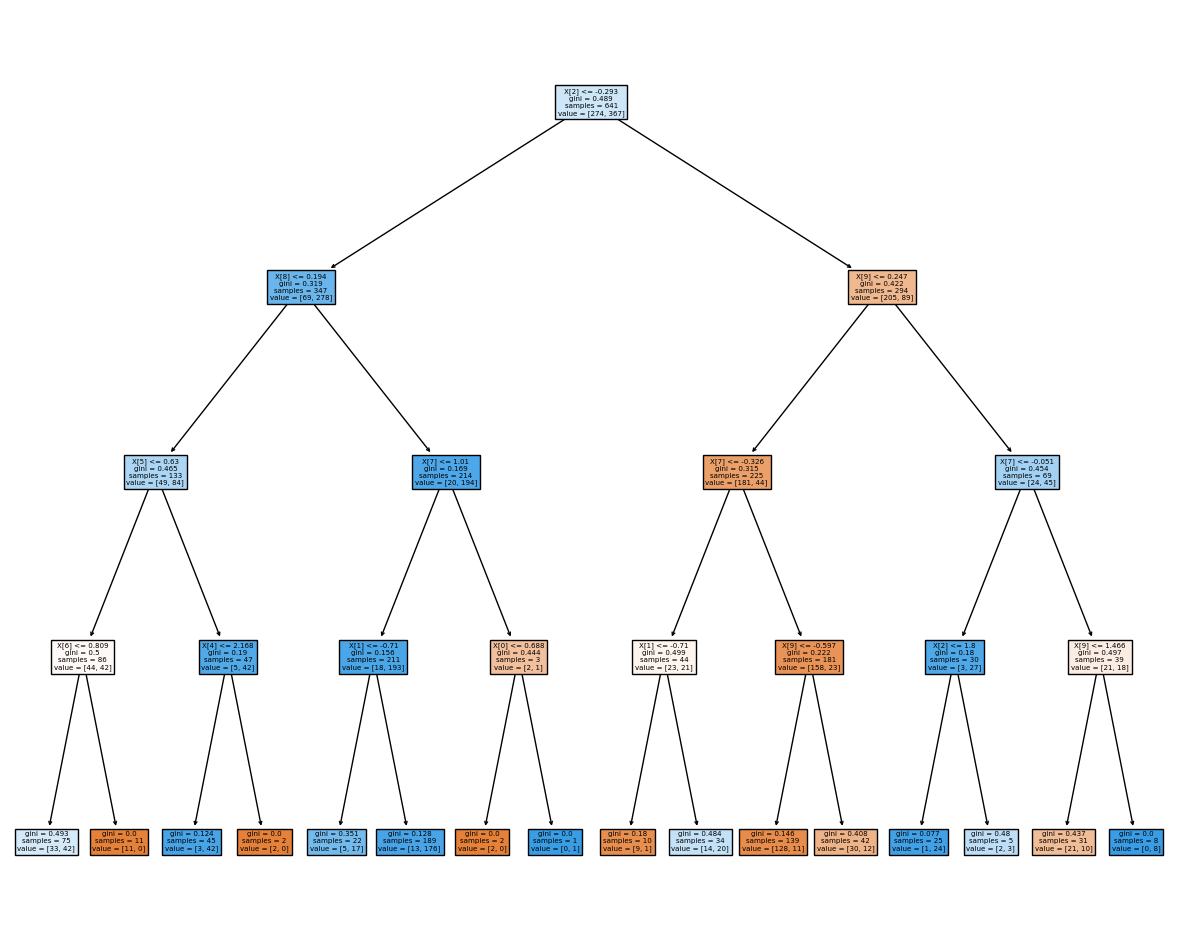

In [223]:
from sklearn import tree
fig = plt.figure(figsize = (15,12))
tree.plot_tree(dt , filled= True)

Fifth,show the sample of Y_pred and Y_test as there are 9 correct out of 10 values.

In [224]:
Y_pred = dt.predict(X_test)
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(10)

,Y_test,Y_pred
416,1,1
325,1,1
267,0,0
241,1,1
875,0,0
352,1,1
171,0,0
218,0,0
896,0,0
514,1,1


Sixth, bulid the f_importances function to give the importance of the vairbales dataset and to prove the result of the decision tree.

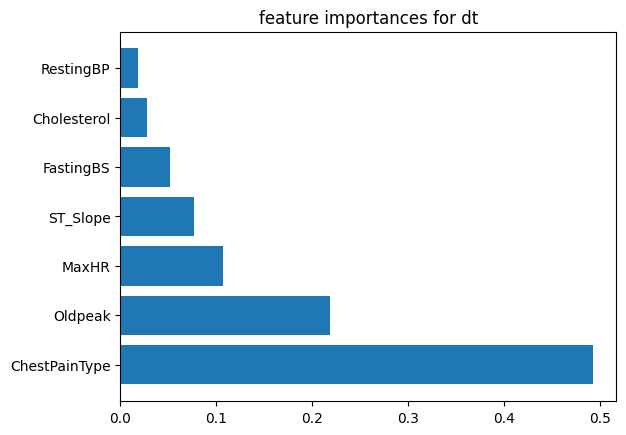

In [136]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for dt')
    plt.show()

# whatever your features are called
features_names = list(df.columns)
    
#dt= DecisionTreeClassifier (max_depth=7, max_features=6)
#df.fit(x_train,y_train)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(dt.feature_importances_), features_names, top=7)

At the end evaluating the model print the Training set score and Test set score: These two values are comparable.So, there is no sign of overfitting 

In [226]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(dt.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt.score(X_test, y_test)))

Training set score: 0.8362
Test set score: 0.7572


In [137]:
DT_pipe = Pipeline([('scaler', StandardScaler()), ('DT', DecisionTreeClassifier(random_state=101))])

In [138]:
param_grid= {'DT__max_features': ['auto','sqrt','log2'],
            'DT__criterion': ['gini','entropy']}

DT_grid=GridSearchCV(DT_pipe, param_grid, cv=5)

In [139]:
DT_grid.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('DT',
                                        DecisionTreeClassifier(random_state=101))]),
             param_grid={'DT__criterion': ['gini', 'entropy'],
                         'DT__max_features': ['auto', 'sqrt', 'log2']})

In [140]:
DT_grid.best_params_

{'DT__criterion': 'entropy', 'DT__max_features': 'auto'}

In [141]:
ypred_DT_grid = DT_grid.predict(X_test)

Use Eval_Report method to show the confusion martix of Decision Tree

In [142]:
def Eval_Report(model, y_pred):
    
    print('********* EVALUATION REPORT ********* \n')
    print('CONFUSION MATRIX: \n')
    print(confusion_matrix(y_test, y_pred))
    print('\nCLASSIFICATION REPORT: \n')
    print(classification_report(y_test, y_pred))
    ########
    #print('\nPLOTS:\n')
    #plot_confusion_matrix(model, X_test, y_test)
    #plot_precision_recall_curve(model, X_test, y_test)
   # plot_roc_curve(model, X_test, y_test)

In [145]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [146]:
Eval_Report(DT_grid, ypred_DT_grid)

********* EVALUATION REPORT ********* 

CONFUSION MATRIX: 

[[ 96  40]
 [ 34 106]]

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       136
           1       0.73      0.76      0.74       140

    accuracy                           0.73       276
   macro avg       0.73      0.73      0.73       276
weighted avg       0.73      0.73      0.73       276



Use ConfusionMatrixDisplay function that can display visual representation matrix of Decision Tree


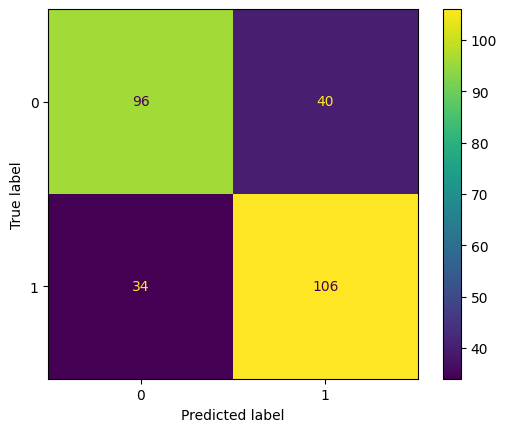

In [150]:
ConfusionMatrixDisplay.from_estimator(DT_grid,X_test ,
   y_test);

# 2) SVM

according to Oldpeak histogram there are some negative data in the dataset... we need to deal with them cause oldpeak can not be negative...

In [237]:
df[df['Oldpeak']<0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63,1,0,100,237.0,1,1,109,0,-0.9,0,1
324,46,1,0,100,237.0,1,2,133,0,-2.6,0,1
325,42,1,0,105,237.0,1,1,128,1,-1.5,1,1
326,45,1,2,110,237.0,0,1,138,0,-0.1,0,0
331,56,1,0,115,237.0,1,2,82,0,-1.0,0,1
332,38,1,2,100,237.0,0,1,179,0,-1.1,0,0
334,51,1,0,130,237.0,1,1,170,0,-0.7,0,1
335,62,1,3,120,237.0,1,0,134,0,-0.8,0,1
352,56,1,0,120,237.0,0,2,100,1,-1.0,1,1
407,62,1,0,115,237.0,1,1,72,1,-0.5,1,1


In [238]:
df.loc[df['Oldpeak']<0,'Oldpeak'] = df[df['Oldpeak']<0]['Oldpeak']*(-1)

In [239]:
df[df['Oldpeak']<0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [240]:
#also in cholesterol histogram we can see there are some zero values that we want to deal with them.
len(df[df['Cholesterol'] == 0].index)/len(df.index)
# %18.7 of our dataset have zero cholesterol.

0.0

**cholesterol** is highly correlated with **FastingBS** So it's better to guess the **cholesterol** of the patients according to their **FastingBS**...

In this section we use the **median** to keep the cholesterol distribution in each fasting blood sugar class unchanged. 

In [241]:
for i in range(2):
    
    df.loc[(df['Cholesterol'] == 0) & (df.FastingBS == i), 'Cholesterol'] = df[(df['FastingBS'] == i) & (df['Cholesterol'] != 0)]['Cholesterol'].median()

Next feature that need to be cleaned is **RestingBP**...
according to the histogram it has some zero values. we know that blood pressure can not possibly be zero...
and according to the heatmap **RestingBP** is highly correlated with **Age**

so same as previous feature we are going to fill the zero values of resting blood pressure...

In [242]:
df[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [243]:
df.loc[df['RestingBP'] == 0, 'RestingBP'] = df['RestingBP'].median()

# Categorical Features (Dummy variables)

In [244]:
df = pd.get_dummies(df, drop_first=True)

In [245]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,1,172,0,0.0,0,0
1,49,0,2,160,180.0,0,1,156,0,1.0,0,1
2,37,1,1,130,283.0,0,2,98,0,0.0,0,0
3,48,0,0,138,214.0,0,1,108,1,1.5,1,1
4,54,1,2,150,195.0,0,1,122,0,0.0,0,0


# Split the Dataset to Train and Test
##### we need to train our model on the training set. And for checking the performance of our model, we use a Test set. That’s why we have to split the X and Y datasets into the Training set and Test set.We split the dataset  to 70% of the records of the dataset for training and 30% for testing

In [246]:
#Split Dataset into X and Y
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

In [247]:
#The train_test_split class of sklearn.model_selection is used for creating training and test split.
from sklearn.model_selection import train_test_split 
#70% data should be in the training tests so test_size = 0.3.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 

Gridsearch is tool that you can use to help optimize the hyperparameters of machine learning. You give it some range or specifications and your algorithm will run and display the most optimum of the specification given.

In [248]:
# 1-We load appropriate Sklearn modules and classes required .
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV

### defining an evaluation function

In [249]:
#libraries
#In python’s sklearn implementation of the Support Vector Classification model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

In [250]:
def Eval_Report(model, y_pred):
    
    print('********* EVALUATION REPORT ********* \n')
    #Evaluate model using confusion matrix
    print('CONFUSION MATRIX : \n')
    print(confusion_matrix(y_test, y_pred))
    print('\nCLASSIFICATION REPORT: \n')
    print(classification_report(y_test, y_pred))
    #Visualize confusion matrix using a plot
    
    print('\nPLOTS:\n')
    
    plot_confusion_matrix(model, X_test, y_test)
    plot_precision_recall_curve(model, X_test, y_test)
    plot_roc_curve(model, X_test, y_test)

### Pipeline

In [251]:
# Create the pipeline
svm_pipe = Pipeline([('scaler', StandardScaler()), ('svm', SVC(random_state = 101))])

##### Hyperparameter Tuning with GridSearchCV
When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.[5] so Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. [6]
[5] "SVM-Hyperparameter Tuning." Kaggle: Your Machine Learning and Data Science Community. https://www.kaggle.com/code/rajeevnair676/svm-hyperparameter-tuning (accessed Apr. 25, 2023).
[6]"Tune Hyperparameters with GridSearchCV." Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/ (accessed Apr. 25, 2023).

In [252]:

param_grid = {'svm__C':[0.01,0.1,1, 10, 100, 1000],
              'svm__gamma':['auto', 'scale', 1, 0.1, 0.01, 0.001, 0.0001],
              'svm__kernel': ['rbf', 'poly'],
              'svm__shrinking': [True, False]}

svm_grid = GridSearchCV(svm_pipe,param_grid, cv=5)

In [253]:
#fits the SVM algorithm to the training set- X_train and y_train.
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC(random_state=101))]),
             param_grid={'svm__C': [0.01, 0.1, 1, 10, 100, 1000],
                         'svm__gamma': ['auto', 'scale', 1, 0.1, 0.01, 0.001,
                                        0.0001],
                         'svm__kernel': ['rbf', 'poly'],
                         'svm__shrinking': [True, False]})

In [254]:
#print best parameter 
svm_grid.best_params_

{'svm__C': 0.1,
 'svm__gamma': 'auto',
 'svm__kernel': 'rbf',
 'svm__shrinking': True}

##### Predict

In [255]:
ypred_svm_grid= svm_grid.predict(X_test)

### Evaluation

********* EVALUATION REPORT ********* 

CONFUSION MATRIX : 

[[105  31]
 [ 22 118]]

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       136
           1       0.79      0.84      0.82       140

    accuracy                           0.81       276
   macro avg       0.81      0.81      0.81       276
weighted avg       0.81      0.81      0.81       276


PLOTS:



/Users/shamma/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/shamma/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/shamma/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be re

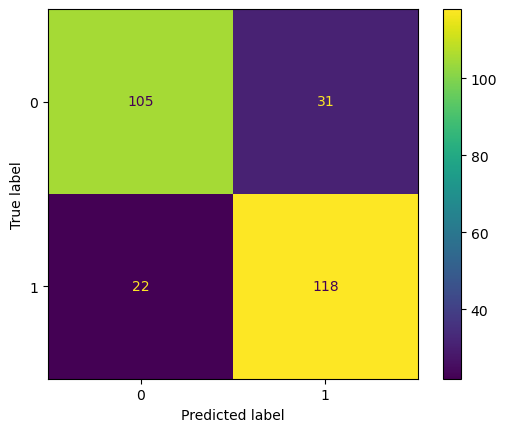

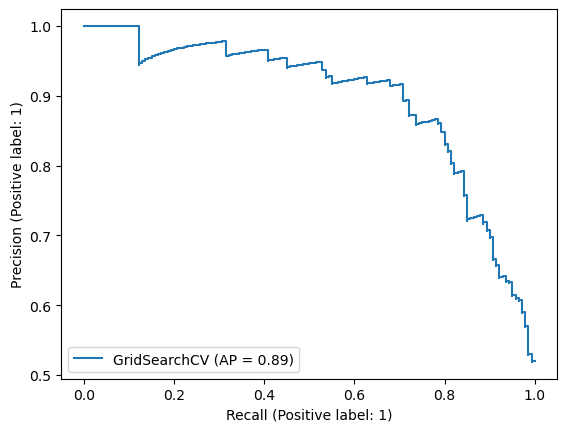

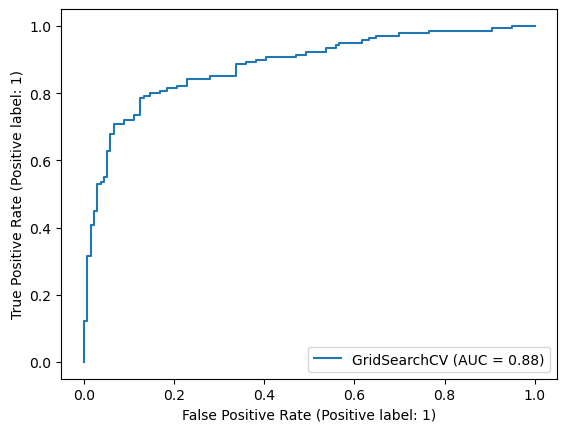

In [256]:
Eval_Report(svm_grid, ypred_svm_grid)

 # 6.Unsupervised Learning 

 During this phase , we clustered the data using an unsupervised learning algorithm.Unsupervised learning is a type of machine learning in which models are trained using unlabeled dataset and are allowed to act on that data without any supervision.
 The goal of unsupervised learning is to find the underlying structure of dataset, group that data according to similarities, and represent that dataset in a compressed format.


### 6.1 K-means clustering

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

